In [1]:
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
import pandas as pd

import tweepy #https://github.com/tweepy/tweepy
import csv
# Used for progress bar
import time
import sys

#Twitter API credentials
consumer_key = "70K9Xv549k0HNty0dvTGx5Tpz"
consumer_secret = "N6zvALwa6d5LCF0VqfCuvWfOFQkqsHblU3yw2XXZUZqWZaGH4v"
access_key = "3170648335-NVnmWZTNwsFAbgrPC1lh4vJ0CA9mipLNFXvSN6x"
access_secret = "U7sqL0mKO4uypD6sI34DOZxAAgdvfCp1WJYhckoiUNneB"

OAUTH_KEYS = {'consumer_key':consumer_key, 'consumer_secret':consumer_secret,
 'access_token_key':access_key, 'access_token_secret':access_secret}
auth = tweepy.OAuthHandler(OAUTH_KEYS['consumer_key'], OAUTH_KEYS['consumer_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv('CONG_2.csv')

In [3]:
# Convert user ID from float to integer.
df.userFromId=df.userFromId.apply(lambda x: int(x))
df.userToId=df.userToId.apply(lambda x: int(x))

In [4]:
G = nx.DiGraph()
#G = nx.Graph()
G.add_nodes_from(df['userFromId'])
#G.add_nodes_from(df['userFromName'])
#G.add_edges_from(zip(df['userFromId'],df['userToId']))

In [5]:
temp = zip(df['userFromId'],df['userToId'])
G.add_edges_from(temp)

In [6]:
dfLookup = df[['userFromName','userFromId']].drop_duplicates()
dfLookup.head()

,userFromName,userFromId
0,premkumar15814,797011196729761792
1,harip95b,936157638
2,raagadotcom,24103864
3,nameisK7,1096455257331134464
4,DineshNesh03,731765100692963328


In [7]:
dfLookup.head()
for userId in dfLookup['userFromId']:
    temp = dfLookup['userFromName'][df['userFromId']==userId]
    print(temp.values[0])
    G.node[userId]['userName'] = temp.values[0]

premkumar15814
harip95b
raagadotcom
nameisK7
DineshNesh03
vijayveriyansi1
venkateshtmalai
linusnaveen10
Kannan44802236
Dineshk11007264
suthan2709
0b901f3830af400
Y_o_u_n_u__s
Aravind08035500
afridheenn
yogeshkumarm4
sathishsrivats
mst_siva
LSVinothKumar1
TrinityMirrorT1
AntonyR45845553
Ruban67295144
igtelugu
premkum37742885
igtamil
punitpatel12345
soumibanerjee27
followTheGupta
Devanginee
Star_roseR
Monu_17
manishpaal
selvam_murali
jena_jeevan
PratibhaGYadav
suniltiwari400


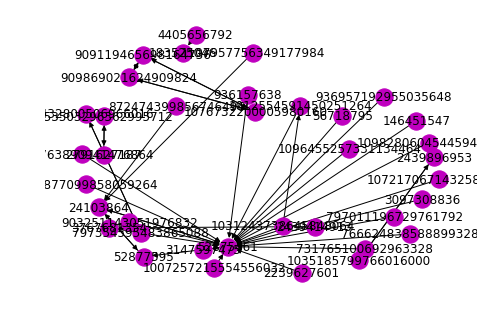

In [8]:
nx.draw(G, pos=nx.spring_layout(G,k=1.2),with_labels=True,node_color='m',edge_color='k')

In [9]:
h=max(dict(G.degree).items(), key = lambda x: x[1])

In [10]:
rt_maximum=h[0]
rt_maximum=int(round(rt_maximum))
rt_maximum

52875461

In [11]:
u = api.get_user(rt_maximum)
print(u.screen_name)

igtamil
